# Лінійна регресія і основні бібліотеки Python для аналізу даних і наукових обчислень

Це завдання присвячено лінійної регресії. На прикладі прогнозування росту людини  за його вагою Ви побачите, яка математика за цим стоїть, а заодно познайомитеся з основними бібліотеками Python, необхідними для подальшого проходження курсу.

**Матеріали**

- Лекції даного курсу по лінійним моделям і градиентному спуску
- [Документація] (http://docs.scipy.org/doc/) по бібліотеках NumPy і SciPy
- [Документація] (http://matplotlib.org/) по бібліотеці Matplotlib
- [Документація] (http://pandas.pydata.org/pandas-docs/stable/tutorials.html) по бібліотеці Pandas
- [Pandas Cheat Sheet] (http://www.analyticsvidhya.com/blog/2015/07/11-steps-perform-data-analysis-pandas-python/)
- [Документація] (http://stanford.edu/~mwaskom/software/seaborn/) по бібліотеці Seaborn

## Завдання 1. Первинний аналіз даних c Pandas

У цьому завданні ми будемо використовувати дані [SOCR] (http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights) за зростом і вагою 25 тисяч підлітків.

**[1].** Якщо у Вас не встановлена **бібліотека Seaborn** - виконайте команду **!pip install seaborn** або в терміналі команду **conda install seaborn**. (Seaborn не входить в збірку Anaconda, але ця бібліотека надає зручну високорівневу функціональність для візуалізації даних).

In [1]:
#!pip install seaborn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Завантажуємо дані за зростом і вагою (*weights_heights.csv*, прикладений в завданні) в об'єкт Pandas DataFrame:

In [2]:
data = pd.read_csv('weights_heights.csv', index_col='Index')

Найчастіше перше, що треба треба зробити після зчитування даних - це подивитися на перші кілька записів. Так можна відловити помилки читання даних (наприклад, якщо замість 10 стовпців вийшов один, в назві якого 9 точок з комою). Також це дозволяє познайомитися з даними, як мінімум, подивитися на ознаки і їх природу (кількісний, категоріальний і т.д.).

Після цього варто побудувати гістограми розподілу ознак - це знову-таки дозволяє зрозуміти природу ознаки (нормальний у нього розподіл, або якийсь ще). Також завдяки гістограмі можна знайти якісь значення, сильно не схожі на інші - "викиди" в даних.
Гістограми зручно будувати методом *plot* Pandas DataFrame з аргументом *kind = 'hist'*.

**Приклад.** Побудуємо гістограму розподілу зростання підлітків з вибірки *data*. Використовуємо метод *plot* для DataFrame *data* c аргументами *y = 'Height'* (це той ознака, розподіл якого ми будуємо)

<AxesSubplot:title={'center':'Height (inch.) distribution'}, ylabel='Frequency'>

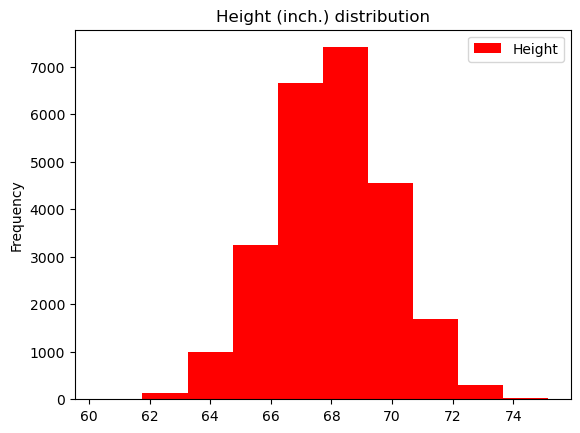

In [3]:
data.plot(y='Height', kind='hist', 
           color='red',  title='Height (inch.) distribution')

Аргументи:

* y = 'Height' * - той ознака, розподіл якого ми будуємо
* kind = 'hist' * - означає, що будується гістограма
* color = 'red' * - колір

 **[2]** . Подивіться на перші 5 записів за допомогою методу *head* Pandas DataFrame. Намалюйте гистограмму розподілу ваги за допомогою методу *plot* Pandas DataFrame. Зробіть гистограмму зеленої, підпишіть картинку.

In [4]:
# Ваш код 
data.head()

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


<AxesSubplot:title={'center':'Weight (pound) distribution'}, ylabel='Frequency'>

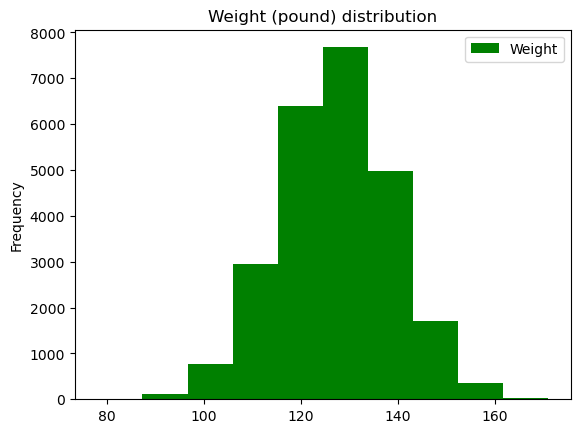

In [5]:
# Ваш код
data.plot(y='Weight', kind = 'hist', color = 'green',
         title = 'Weight (pound) distribution')

Один з ефективних методів первинного аналізу даних - відображення попарних залежностей ознак. Створюється $m \times m$ графіків (*m* - число ознак), де по діагоналі малюються гістограми розподілу ознак, а поза діагоналі - scatter plots залежності двох ознак. Це можна робити за допомогою методу $scatter \_matrix$ Pandas Data Frame або *pairplot* бібліотеки Seaborn.

Щоб проілюструвати цей метод, цікавіше додати третю ознаку. Створимо ознаку *Індекс маси тіла* ([BMI] (https://en.wikipedia.org/wiki/Body_mass_index)). Для цього скористаємося зручною зв'язкою методу *apply* Pandas DataFrame і lambda-функцій Python.

In [6]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [7]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

**[3].** Побудуйте картинку, на якій будуть відображені попарні залежності ознак, 'Height', 'Weight' і 'BMI' один від одного. Використовуйте метод * pairplot * бібліотеки Seaborn.

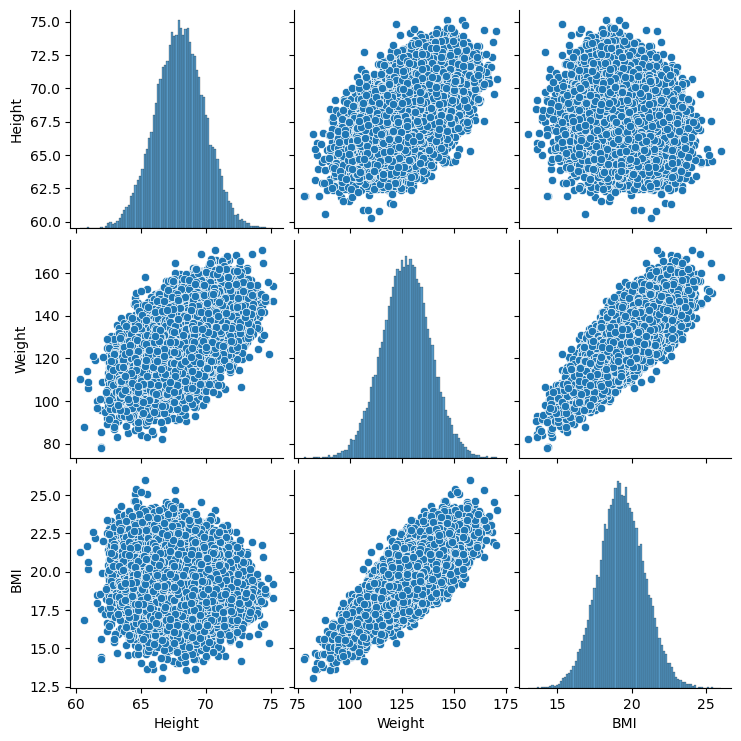

In [8]:
# Ваш код 
sns.pairplot(data)

Часто при первинному аналізі даних треба досліджувати залежність якогось кількісної ознаки від категоріального (скажімо, зарплати від статі працівника). У цьому допоможуть "ящики з вусами" - boxplots бібліотеки Seaborn. Box plot - це компактний спосіб показати статистики дійсних ознак (середнє і квартилі) за різним значеннями категоріальної ознаки. Також допомагає відслідковувати "викиди" - спостереження, в яких значення цієї дійсної ознаки сильно відрізняється від інших.

**[4]**. Створіть в DataFrame * data * новий ознака * weight_category *, який буде мати 3 значення: 1 - якщо вага менше 120 фунтів. (~ 54 кг.), 3 - якщо вага більше або дорівнює 150 фунтів (~ 68 кг.), 2 - в інших випадках. Побудуйте «ящик з вусами» (boxplot), що демонструє залежність росту від вагової категорії. Використовуйте метод * boxplot * бібліотеки Seaborn і метод * apply * Pandas DataFrame. Підпишіть вісь * y * міткою «Ріст», вісь * x * - міткою «Вагова категорія».
Див. https://en.wikipedia.org/wiki/Box_plot

Text(0.5, 1.0, 'Залежність росту від вагової категорії')

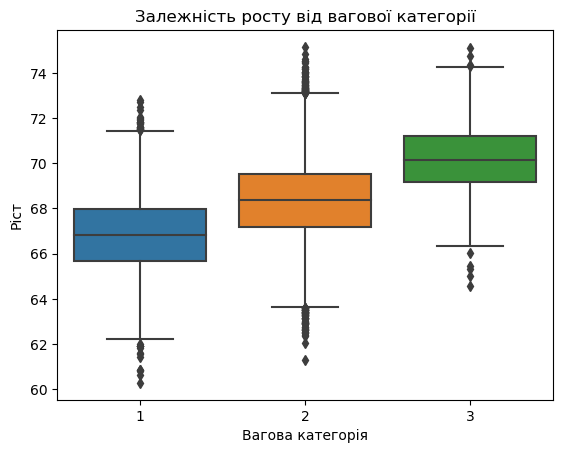

In [9]:
def weight_category(weight):
    #pass
    # Ваш код 
    if weight >= 150:
        return 3
    elif weight < 120:
        return 1
    else:
        return 2

data['weight_cat'] = data['Weight'].apply(weight_category)
# Ваш код 
sns.boxplot(x = "weight_cat", y = "Height", data = data)
plt.xlabel('Вагова категорія')
plt.ylabel('Ріст')
plt.title('Залежність росту від вагової категорії')

**[5].** Побудуйте scatter plot залежності зростання від ваги, використовуючи метод *plot* для Pandas DataFrame з аргументом *kind = 'scatter'*. Підпишіть картинку.

<AxesSubplot:title={'center':'Функція залежності росту від ваги'}, xlabel='Weight', ylabel='Height'>

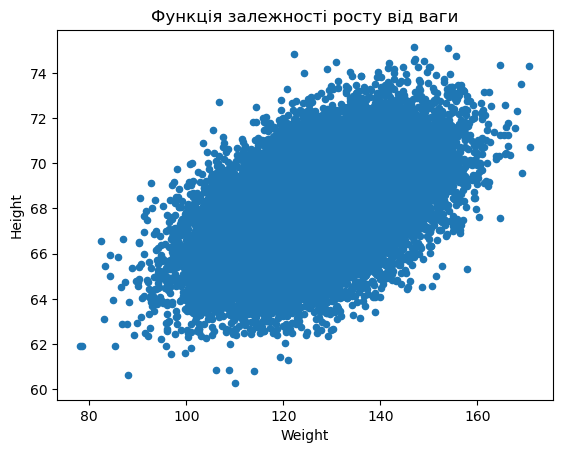

In [10]:
# Ваш код
data.plot("Weight", "Height", kind = 'scatter', title = "Функція залежності росту від ваги")

## Завдання 2. Мінімізація квадратичної помилки

У простій постановці завдання прогнозу значення дійсної ознаки за іншими ознаками (завдання відновлення регресії) вирішується мінімізацією квадратичної функції помилки.

**[6].** Напишіть функцію, яка за двома параметрами $w_0$ і $w_1$ обчислює квадратичную помилку наближення залежності зростання $y$ від ваги $x$ прямою лінією $y = w_0 + w_1 * x$:
$$error (w_0, w_1) = \sum_{i = 1} ^ n {(y_i - (w_0 + w_1 * x_i))} ^ 2$$
Тут $n$ - число спостережень в наборі даних, $y_i$ і $x_i$ - зріст і вагу $i$ -ої людини в наборі даних.

In [11]:
# Ваш код
def error_w0_w1(x,y,w0, w1):
    return sum((y-(w0 + w1*x))**2)

Отже, ми вирішуємо завдання: як через хмару точок, відповідних спостереженнями в нашому наборі даних, в просторі ознак "Зріст" та "Вага" провести пряму лінію так, щоб мінімізувати функціонал з п. 6. Для початку давайте відобразимо хоч якісь прямі і переконаємося, що вони погано передають залежність росту від ваги.

**[7].** Проведіть на графіку з п. 5 Завдання 1 дві прямі, що відповідають значенням параметрів ($ w_0, w_1) = (60, 0.05) $ і ($ w_0, w_1) = (50, 0.16) $ . Використовуйте метод *plot* з *matplotlib.pyplot*, а також метод *linspace* бібліотеки NumPy. Підпишіть осі і графік.

Text(0, 0.5, 'Ріст')

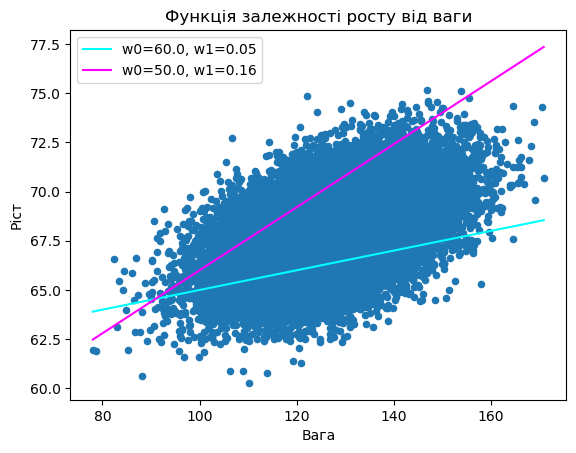

In [12]:
# Ваш код
data.plot("Weight", "Height", kind = 'scatter', title = "Функція залежності росту від ваги")
weight_data = np.linspace(min(data["Weight"]), max(data["Weight"]), num = 100)
w0, w1 = 60.0, 0.05
plt.plot(weight_data, w0+w1*weight_data, label=f'w0={w0}, w1={w1}', color='cyan')   
w0, w1 = 50.0, 0.16
plt.plot(weight_data, w0+w1*weight_data, label=f'w0={w0}, w1={w1}', color='magenta')
plt.legend()
plt.xlabel('Вага')
plt.ylabel('Ріст')

Мінімізація квадратичної функції помилки - відносна просте завдання, оскільки функція опукла. Для такого завдання існує багато методів оптимізації. Подивимося, як функція помилки залежить від одного параметра (нахил прямої), якщо другий параметр (вільний член) зафіксувати.

**[8].** Побудуйте графік залежності функції помилки, обчисленою в п. 6, від параметра $ w_1 $ при $ w_0 $ = 50. Підпишіть осі і графік.

Text(0.5, 1.0, 'Функція залежності помилки від параметра w1')

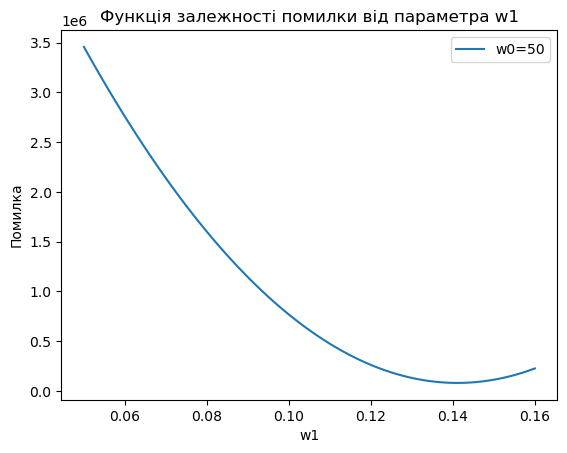

In [13]:
# Ваш код 
x = np.array(data["Weight"])
y = np.array(data["Height"])
w0_new = 50
w1_new = np.array(np.linspace(0.05, 0.16, num=100))
error_w0_w1_new = [error_w0_w1(x,y,w0_new,w1) for w1 in w1_new]
plt.plot(w1_new, error_w0_w1_new, label=f'w0={w0_new}')
plt.legend()
plt.xlabel('w1')
plt.ylabel('Помилка')
plt.title('Функція залежності помилки від параметра w1')

Тепер методом оптимізації знайдемо "оптимальний" нахил прямої, що наближає залежність росту від ваги, при фіксованому коефіцієнті $ w_0 = 50 $.

**[9].** За допомогою методу *minimize_scalar* з *scipy.optimize* знайдіть мінімум функції, визначеної в п. 6, для значень параметра $ w_1 $ в діапазоні [-5,5]. Проведіть на графіку з п. 5 Завдання 1 пряму, відповідну значенням параметрів ($ w_0 $, $ w_1 $) = (50, $ w_1 \ _opt $), де $ w_1 \ _opt $ - знайдене в п. 8 оптимальне значення параметра $ w_1 $.

In [14]:
# Ваш код 
import scipy.optimize as opt

x = np.array(data["Weight"])
y = np.array(data["Height"])
w0_opt = 50
w1_opt = opt.minimize_scalar(lambda w1_x: error_w0_w1(x,y,w0_opt,w1_x), bounds=(-5, 5))
w1_opt.x

0.14109203728834382

Text(0, 0.5, 'Ріст')

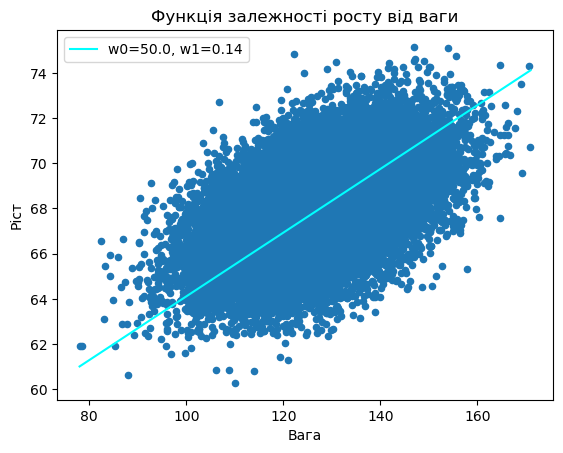

In [15]:
# Ваш код 
data.plot("Weight", "Height", kind = 'scatter', title = "Функція залежності росту від ваги")
#
wo, w1 = 50.0, w1_opt.x
plt.plot(weight_data, w0+w1*weight_data, label=f'w0={w0}, w1={round(w1,2)}', color='cyan') 
plt.legend()
plt.xlabel('Вага')
plt.ylabel('Ріст')

При аналізі багатовимірних даних осіб часто хоче отримати інтуїтивне уявлення про природу даних за допомогою візуалізації. На жаль, при числі ознак більше 3 такі картинки намалювати неможливо. На практиці для візуалізації даних в 2D і 3D в даних виділаяют 2 або, відповідно, 3 головні компоненти (як саме це робиться - ми побачимо далі в курсі) та відображають дані на площині або в обсязі.

Подивимося, як у Python малювати 3D картинки, на прикладі відображення функції $z(x,y) = sin(\sqrt{x^2+y^2})$ для значень $x$ і $y$ з інтервалу [-5 , 5] c кроком 0.25.

In [16]:
from mpl_toolkits.mplot3d import Axes3D

Створюємо об'єкти типу matplotlib.figure.Figure (малюнок) і matplotlib.axes._subplots.Axes3DSubplot (вісь).

C:\Users\Admin\AppData\Local\Temp\ipykernel_2684\906706492.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca (projection = '3d') # get current axis


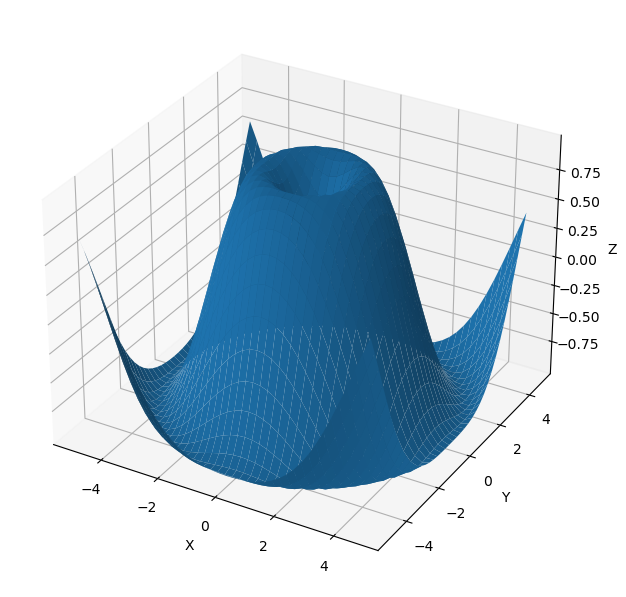

In [17]:
fig = plt.figure ()
fig.set_size_inches(13.5, 7.5)
ax = fig.gca (projection = '3d') # get current axis

# Створюємо масиви NumPy з координатами точок по осях X і У.
# Використовуємо метод meshgrid, при якому по векторах координат
# Створюється матриця координат. Задаємо потрібну функцію Z (x, y).
X = np.arange (-5, 5, 0.25)
Y = np.arange (-5, 5, 0.25)
X, Y = np.meshgrid (X, Y)
Z = np.sin (np.sqrt (X ** 2 + Y ** 2))

# Нарешті, використовуємо метод * plot_surface * об'єкта
# Типу Axes3DSubplot. Також підписуємо осі.
surf = ax.plot_surface (X, Y, Z)
ax.set_xlabel ( 'X')
ax.set_ylabel ( 'Y')
ax.set_zlabel ( 'Z')
plt.show ()

**[10].** Побудуйте 3D-графік залежності функції помилки, обчисленою в п.6 від параметрів $ w_0 $ і $ w_1 $. Підпишіть вісь $ x $ міткою «Intercept», вісь $ y $ - міткою «Slope», a вісь $ z $ - міткою «Error».

C:\Users\Admin\AppData\Local\Temp\ipykernel_2684\541738404.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca (projection = '3d') # get current axis


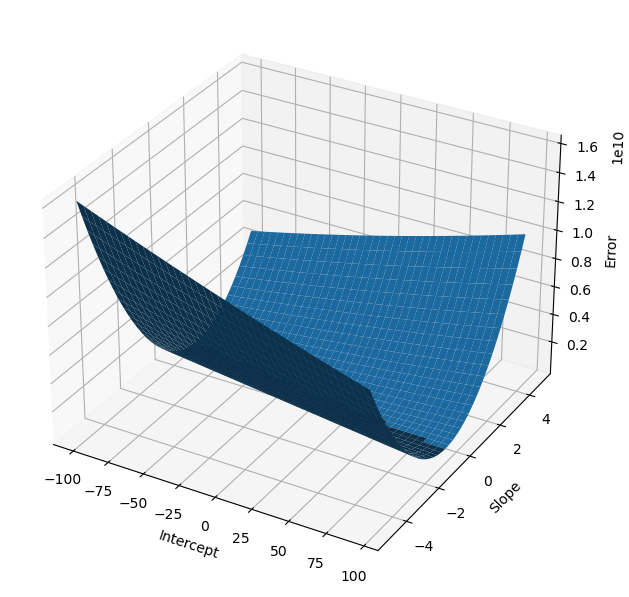

In [18]:
# Ваш код
fig = plt.figure ()
fig.set_size_inches(13.5, 7.5)
ax = fig.gca (projection = '3d') # get current axis

# Створюємо масиви NumPy з координатами точок по осях X і У.
# Використовуємо метод meshgrid, при якому по векторах координат
# Створюється матриця координат. Задаємо потрібну функцію Z (x, y).
w0 = np.arange (-100, 100, 5)
w1 = np.arange (-5, 5, 0.25)
w0, w1 = np.meshgrid (w0, w1)
error = np.zeros(w1.shape)
for i in range(w1.shape[0]):
    for j in range(w1.shape[1]):
        error[i,j]= error_w0_w1(x,y,w0[i,j], w1[i,j])

# Нарешті, використовуємо метод * plot_surface * об'єкта
# Типу Axes3DSubplot. Також підписуємо осі.
surf = ax.plot_surface (w0, w1, error)
ax.set_xlabel ('Intercept')
ax.set_ylabel ('Slope')
ax.set_zlabel ('Error')
plt.show ()

**[11].** За допомогою методу * minimize * з scipy.optimize знайдіть мінімум функції, визначеної в п. 6, для значень параметра $ w_0 $ в діапазоні [-100,100] і $ w_1 $ - в діапазоні [-5 , 5]. Початкова точка - ($ w_0 $, $ w_1 $) = (0, 0). Використовуйте метод оптимізації L-BFGS-B (аргумент method методу minimize). Проведіть на графіку з п. 5 Завдання 1 пряму, відповідну знайденим оптимальних значень параметрів $ w_0 $ і $ w_1 $. Підпишіть осі і графік.

In [19]:
# Ваш код 
import scipy.optimize as opt

x = np.array(data["Weight"])
y = np.array(data["Height"])
w_opt = opt.minimize(lambda w: error_w0_w1(x,y,w[0],w[1]), (0,0), bounds=((-100, 100),(-5,5)), method='L-BFGS-B')
w_opt.x

array([57.5716017 ,  0.08200785])

Text(0, 0.5, 'Ріст')

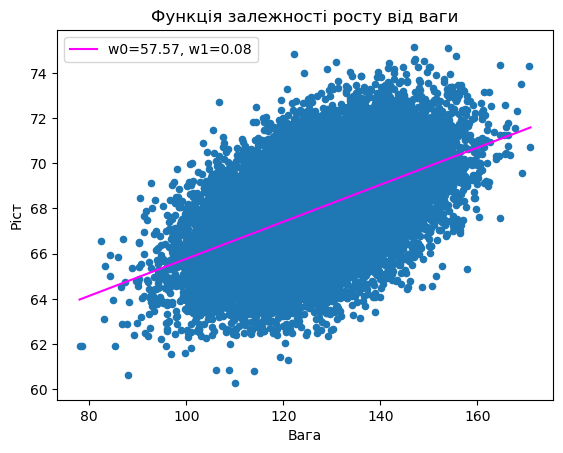

In [20]:
# Ваш код
data.plot("Weight", "Height", kind = 'scatter', title = "Функція залежності росту від ваги")
weight_data = np.linspace(min(data["Weight"]), max(data["Weight"]), num = 100)
w0, w1 = w_opt.x[0], w_opt.x[1]
plt.plot(weight_data, w0+w1*weight_data, label=f'w0={round(w0,2)}, w1={round(w1,2)}', color='magenta')   
plt.legend()
plt.xlabel('Вага')
plt.ylabel('Ріст')

## Критерії оцінки роботи

- Чи виконується зошит IPython без помилок? (15 балів)
- Чи вірно відображена гістограма розподілу зростання з п. 2? (3 бали). Чи правильно оформлені підписи? (1 бал)
- Чи вірно відображені попарні залежності ознак з п. 3? (3 бали). Чи правильно оформлені підписи? (1 бал)
- Чи вірно відображена залежність росту від вагової категорії з п. 4? (3 бали). Чи правильно оформлені підписи? (1 бал)
- Чи вірно відображений scatter plot зростання від ваги з п. 5? (3 бали). Чи правильно оформлені підписи? (1 бал)
- Чи правильно реалізована функція підрахунку квадратичної помилки з п. 6? (10 балів)
- Чи правильно намальований графік з п. 7? (3 бали) Чи правильно оформлені підписи? (1 бал)
- Чи правильно намальований графік з п. 8? (3 бали) Чи правильно оформлені підписи? (1 бал)
- Чи правильно використовується метод minimize \ _scalar з scipy.optimize? (6 балів). Чи правильно намальований графік з п. 9? (3 бали) Чи правильно оформлені підписи? (1 бал)
- Чи правильно намальований 3D-графік з п. 10? (6 балів) Чи правильно оформлені підписи? (1 бал)
- Чи правильно використовується метод minimize з scipy.optimize? (6 балів). Чи правильно намальований графік з п. 11? (3 бали). Чи правильно оформлені підписи? (1 бал)

## Самоперевірка

In [21]:
# Поставте собі оцінку відповідно критеріям
print("Оцінка =", 76, "з 76.")

Оцінка = 76 з 76.


## Надішліть на перевірку ваш файл КП01_Прізвище_linreg_height_weight.ipynb¶